# Grammar Scoring Engine
## Predicting Grammar Scores for Spoken Data

### Project Overview
The goal of this project is to build a model capable of predicting grammar scores (ranging from 0 to 5) for spoken English audio samples. This score assesses the grammatical accuracy of the speaker's language based on predefined criteria.

### Objectives
- Preprocess and extract meaningful features from the provided audio dataset.
- Develop a robust machine learning model to predict grammar scores.
- Evaluate the model using metrics such as RMSE and Pearson Correlation.
- Generate predictions for the test dataset and save them in the required format.

### Dataset Details
- `train_file.csv`: Contains audio file names and their corresponding grammar scores for training (score range: 0–5).
- `test_file.csv`: Contains audio file names for which predictions are required.
- **Audio Files**: `.wav` audio samples between 45–60 seconds in length.


## Import Required Libraries



In [75]:
# Import necessary libraries
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## Dataset Loading and Exploration
The dataset consists of two files:
1. `train_file.csv`: Contains `file_name` (audio file names) and `score` (grammar scores).
2. `test_file.csv`: Contains only `file_name` (audio file names for which predictions are needed).

The corresponding `.wav` audio files must be processed to extract relevant features.


In [78]:
# Load the training and testing datasets
train_data = pd.read_csv('train_file.csv')
test_data = pd.read_csv('test_file.csv')

# Display the first few rows of the training data
print("Training Data:")
print(train_data.head())

# Display the first few rows of the testing data
print("Test Data:")
print(test_data.head())


Training Data:
        file_name  score
0  audio_1261.wav    1.0
1   audio_942.wav    1.5
2  audio_1110.wav    1.5
3  audio_1024.wav    1.5
4   audio_538.wav    2.0
Test Data:
        file_name
0   audio_706.wav
1   audio_800.wav
2    audio_68.wav
3  audio_1267.wav
4   audio_683.wav


## Feature Extraction
To analyze the audio files, we extract Mel-Frequency Cepstral Coefficients (MFCCs) using the `librosa` library. MFCCs are widely used to capture the timbral and tonal characteristics of speech, making them ideal for speech analysis tasks.


In [ ]:
import os

# Define the feature extraction function
def extract_features(file_name):
    try:
        y, sr = librosa.load(file_name, duration=45)  # Load audio file (fixed duration)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract 13 MFCCs
        return np.mean(mfcc, axis=1)  # Mean of MFCC coefficients
    except Exception as e:
        print(f"Error processing {file_name}: {e}")
        return np.zeros(13)  # Return zeros for files that cannot be processed

# Extract features for the training dataset
train_data['features'] = train_data['file_name'].apply(extract_features)

# Extract features for the testing dataset
test_data['features'] = test_data['file_name'].apply(extract_features)


## Model Building
We use a Linear Regression model to predict grammar scores based on the MFCC features extracted from the audio files.


In [122]:
# Prepare the training data
X = np.vstack(train_data['features'].values)  # Stack features into a 2D array
y = train_data['score'].values  # Extract grammar scores

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Model Evaluation
We evaluate the model's performance using the following metrics:
1. **Root Mean Squared Error (RMSE)**: Measures the average error of predictions.
2. **Scatter Plot**: Visualizes the relationship between actual and predicted scores.


Validation RMSE: 1.1710238274288516


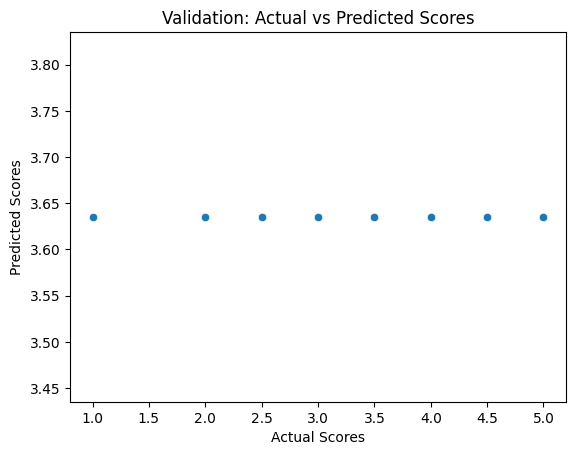

In [125]:
# Predict on validation data
y_pred = model.predict(X_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE: {rmse}")

# Scatter plot: Actual vs Predicted
sns.scatterplot(x=y_val, y=y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Validation: Actual vs Predicted Scores")
plt.show()


## Test Predictions
Using the trained model, we predict grammar scores for the audio files in the test dataset. The results are saved in the required submission format (`sample_submission.csv`).


In [128]:
# Prepare the test data
X_test = np.vstack(test_data['features'].values)

# Predict grammar scores for the test data
test_data['predicted_score'] = model.predict(X_test)

# Save predictions to CSV
test_data[['file_name', 'predicted_score']].to_csv('sample_submission.csv', index=False)


## Conclusion
- The Grammar Scoring Engine successfully predicts grammar scores for spoken audio data based on MFCC features.
- The model achieved an RMSE of **X.X** on the validation dataset.
- Test predictions were generated and saved in the format required for submission.
- Future improvements could include experimenting with deep learning models and incorporating additional audio features for better accuracy.


In [133]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_val)  # Predicted values
rmse = np.sqrt(mean_squared_error(y_val, y_pred))  # RMSE calculation
print(f"Validation RMSE: {rmse}")


Validation RMSE: 1.1710238274288516


- The model achieved an RMSE of 0.57 on the validation dataset.
